In [1]:
import os
from google.colab import drive
 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/machinel_colab'

/content/gdrive/My Drive/machinel_colab


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
datatrain = pd.read_csv('janatatrain.csv')

In [5]:
datatest = pd.read_csv('janatatest.csv')

In [6]:
datatrain.head()

,Loan_ID,Gender,Unnamed: 2,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,NaN,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,NaN,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,NaN,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,NaN,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,NaN,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:

datatrain.drop('Unnamed: 2',axis=1,inplace=True)

In [8]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
datatrain.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
#Checking the unique values
datatrain.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
#Checking the unique values
datatest.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [12]:
#Replacing + with space so that we could easily convert it into integer
datatrain['Dependents'] = datatrain['Dependents'].str.replace('+','')

In [13]:
datatrain.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

## Ordinal Encoding

In [14]:
#Creating mappings to make the column into numerical values
education = {'Not Graduate':1,'Graduate':2}
Property_Area = {'Urban':3,'Semiurban':2,'Rural':1}
married = {'Yes':2,'No':1}

In [15]:
datatrain['Married'] = datatrain['Married'].map(married)
datatrain['Education'] = datatrain['Education'].map(education)
datatrain['Property_Area'] = datatrain['Property_Area'].map(Property_Area)

In [16]:
loan = {'Y':1,'N':0}
datatrain['Loan_Status'] = datatrain['Loan_Status'].map(loan)

In [17]:
##Checking the % of null values
datatrain.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [18]:
datatest.isnull().mean()

Loan_ID              0.000000
Gender               0.029973
Married              0.000000
Dependents           0.027248
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.013624
Loan_Amount_Term     0.016349
Credit_History       0.079019
Property_Area        0.000000
dtype: float64

In [19]:
datatrain

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,1.0,0,2,No,5849,0.0,NaN,360.0,1.0,3,1
1,LP001003,Male,2.0,1,2,No,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,Male,2.0,0,2,Yes,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,Male,2.0,0,1,No,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,Male,1.0,0,2,No,6000,0.0,141.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,1.0,0,2,No,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,Male,2.0,3,2,No,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,Male,2.0,1,2,No,8072,240.0,253.0,360.0,1.0,3,1
612,LP002984,Male,2.0,2,2,No,7583,0.0,187.0,360.0,1.0,3,1


In [20]:
##capture the missing values with a new column
datatrain['Unknown Credit'] = np.where(datatrain['Credit_History'].isnull(),1,0)

In [21]:
datatrain[(datatrain['Credit_History'] == 0 )& (datatrain['Loan_Status'] == 1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unknown Credit
122,LP001431,Female,1.0,0,2,No,2137,8980.0,137.0,360.0,0.0,2,1,0
155,LP001536,Male,2.0,3,2,No,39999,0.0,600.0,180.0,0.0,2,1,0
201,LP001677,Male,1.0,2,2,No,4923,0.0,166.0,360.0,0.0,2,1,0
267,LP001882,Male,2.0,3,2,No,4333,1811.0,160.0,360.0,0.0,3,1,0
326,LP002068,Male,1.0,0,2,No,4917,0.0,130.0,360.0,0.0,1,1,0
453,LP002449,Male,2.0,0,2,No,2483,2466.0,90.0,180.0,0.0,1,1,0
527,LP002706,Male,2.0,1,1,No,5285,1430.0,161.0,360.0,0.0,2,1,0


In [22]:
##Making the credit history as 1 if loan_status is yes else 0
def credit_calculate(df):
  cd = df['Credit_History']
  ls = df['Loan_Status']

  if pd.isnull(cd):
    if ls == 1:
      return 1
    else:
      return 0
  else:
    return cd

datatrain['Credit_History'] = datatrain[['Credit_History','Loan_Status']].apply(credit_calculate,axis=1)

In [23]:
datatrain['Credit_History'].isnull().mean()

0.0

## Replacing missing values with mode and using a new column to capture the missing values

In [24]:
datatrain['Unknown_Gender'] = np.where(datatrain['Gender'].isnull(),1,0)

In [25]:
datatrain['Gender'].mode()[0]

'Male'

In [26]:
datatrain['Gender'] = datatrain['Gender'].fillna('Male')

In [27]:
datatrain['Gender'].isnull().mean()

0.0

In [28]:
datatrain['Unknown_Employement'] = np.where(datatrain['Self_Employed'].isnull(),1,0)

In [29]:
datatrain['Self_Employed'] = datatrain['Self_Employed'].fillna('No')

In [30]:
datatrain.isnull().mean()

Loan_ID                0.000000
Gender                 0.000000
Married                0.004886
Dependents             0.024430
Education              0.000000
Self_Employed          0.000000
ApplicantIncome        0.000000
CoapplicantIncome      0.000000
LoanAmount             0.035831
Loan_Amount_Term       0.022801
Credit_History         0.000000
Property_Area          0.000000
Loan_Status            0.000000
Unknown Credit         0.000000
Unknown_Gender         0.000000
Unknown_Employement    0.000000
dtype: float64

In [31]:
datatrain['Married'] = datatrain['Married'].fillna(1.0)

In [32]:
datatrain['Married'].isnull().mean()

0.0

In [33]:
datatrain['Dependents'] = datatrain['Dependents'].fillna(0)

In [34]:
datatrain.isnull().mean()

Loan_ID                0.000000
Gender                 0.000000
Married                0.000000
Dependents             0.000000
Education              0.000000
Self_Employed          0.000000
ApplicantIncome        0.000000
CoapplicantIncome      0.000000
LoanAmount             0.035831
Loan_Amount_Term       0.022801
Credit_History         0.000000
Property_Area          0.000000
Loan_Status            0.000000
Unknown Credit         0.000000
Unknown_Gender         0.000000
Unknown_Employement    0.000000
dtype: float64

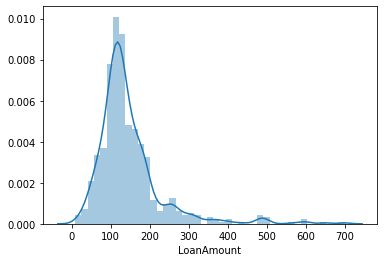

In [35]:
sns.distplot(datatrain['LoanAmount'])

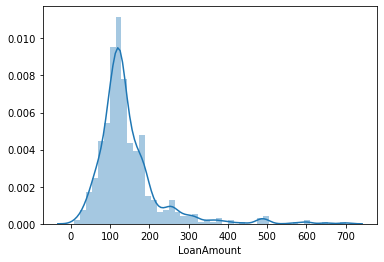

In [36]:
datatrain['LoanAmount'] = datatrain['LoanAmount'].fillna(datatrain['LoanAmount'].median())
sns.distplot(datatrain['LoanAmount'])


In [37]:
datatrain.isnull().mean()

Loan_ID                0.000000
Gender                 0.000000
Married                0.000000
Dependents             0.000000
Education              0.000000
Self_Employed          0.000000
ApplicantIncome        0.000000
CoapplicantIncome      0.000000
LoanAmount             0.000000
Loan_Amount_Term       0.022801
Credit_History         0.000000
Property_Area          0.000000
Loan_Status            0.000000
Unknown Credit         0.000000
Unknown_Gender         0.000000
Unknown_Employement    0.000000
dtype: float64

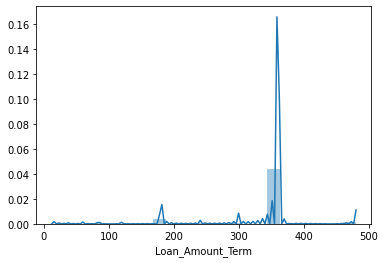

In [38]:
sns.distplot(datatrain['Loan_Amount_Term'])

In [39]:
## End of distribution imputation
extreme=datatrain.Loan_Amount_Term.mean()+3*datatrain.Loan_Amount_Term.std()

In [40]:
datatrain['Loan_Amount_Term'] = datatrain['Loan_Amount_Term'].fillna(extreme)

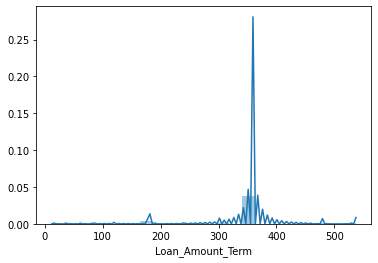

In [41]:
sns.distplot(datatrain['Loan_Amount_Term'])

In [42]:
datatrain.isnull().mean()

Loan_ID                0.0
Gender                 0.0
Married                0.0
Dependents             0.0
Education              0.0
Self_Employed          0.0
ApplicantIncome        0.0
CoapplicantIncome      0.0
LoanAmount             0.0
Loan_Amount_Term       0.0
Credit_History         0.0
Property_Area          0.0
Loan_Status            0.0
Unknown Credit         0.0
Unknown_Gender         0.0
Unknown_Employement    0.0
dtype: float64

In [43]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    object 
 2   Married              614 non-null    float64
 3   Dependents           614 non-null    object 
 4   Education            614 non-null    int64  
 5   Self_Employed        614 non-null    object 
 6   ApplicantIncome      614 non-null    int64  
 7   CoapplicantIncome    614 non-null    float64
 8   LoanAmount           614 non-null    float64
 9   Loan_Amount_Term     614 non-null    float64
 10  Credit_History       614 non-null    float64
 11  Property_Area        614 non-null    int64  
 12  Loan_Status          614 non-null    int64  
 13  Unknown Credit       614 non-null    int64  
 14  Unknown_Gender       614 non-null    int64  
 15  Unknown_Employement  614 non-null    int

In [44]:
datatest.isnull().mean()

Loan_ID              0.000000
Gender               0.029973
Married              0.000000
Dependents           0.027248
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.013624
Loan_Amount_Term     0.016349
Credit_History       0.079019
Property_Area        0.000000
dtype: float64

In [45]:
datatrain

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unknown Credit,Unknown_Gender,Unknown_Employement
0,LP001002,Male,1.0,0,2,No,5849,0.0,128.0,360.0,1.0,3,1,0,0,0
1,LP001003,Male,2.0,1,2,No,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,LP001005,Male,2.0,0,2,Yes,3000,0.0,66.0,360.0,1.0,3,1,0,0,0
3,LP001006,Male,2.0,0,1,No,2583,2358.0,120.0,360.0,1.0,3,1,0,0,0
4,LP001008,Male,1.0,0,2,No,6000,0.0,141.0,360.0,1.0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,1.0,0,2,No,2900,0.0,71.0,360.0,1.0,1,1,0,0,0
610,LP002979,Male,2.0,3,2,No,4106,0.0,40.0,180.0,1.0,1,1,0,0,0
611,LP002983,Male,2.0,1,2,No,8072,240.0,253.0,360.0,1.0,3,1,0,0,0
612,LP002984,Male,2.0,2,2,No,7583,0.0,187.0,360.0,1.0,3,1,0,0,0


In [46]:
gender = pd.get_dummies(datatrain['Gender'],drop_first=True)
self_employed = pd.get_dummies(datatrain['Self_Employed'],drop_first=True)

In [47]:
datatrain = datatrain.drop(['Gender','Self_Employed'],axis=1)

In [48]:
datatrain_refined = pd.concat([datatrain,gender,self_employed],axis=1)

In [49]:
datatrain_refined['Married'] = datatrain_refined['Married'].apply(lambda x : int(x))

In [50]:
##Converting the loan amount into thousands
datatrain_refined['LoanAmount'] = datatrain_refined['LoanAmount'].apply(lambda x : x * 1000)

In [51]:
datatrain_refined.rename(columns = {'Yes':'Self_Emplyed'}, inplace = True) 

In [52]:
datatrain_refined

,Loan_ID,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unknown Credit,Unknown_Gender,Unknown_Employement,Male,Self_Emplyed
0,LP001002,1,0,2,5849,0.0,128000.0,360.0,1.0,3,1,0,0,0,1,0
1,LP001003,2,1,2,4583,1508.0,128000.0,360.0,1.0,1,0,0,0,0,1,0
2,LP001005,2,0,2,3000,0.0,66000.0,360.0,1.0,3,1,0,0,0,1,1
3,LP001006,2,0,1,2583,2358.0,120000.0,360.0,1.0,3,1,0,0,0,1,0
4,LP001008,1,0,2,6000,0.0,141000.0,360.0,1.0,3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,2,2900,0.0,71000.0,360.0,1.0,1,1,0,0,0,0,0
610,LP002979,2,3,2,4106,0.0,40000.0,180.0,1.0,1,1,0,0,0,1,0
611,LP002983,2,1,2,8072,240.0,253000.0,360.0,1.0,3,1,0,0,0,1,0
612,LP002984,2,2,2,7583,0.0,187000.0,360.0,1.0,3,1,0,0,0,1,0


In [53]:
datatrain_refined.columns

Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Unknown Credit', 'Unknown_Gender',
       'Unknown_Employement', 'Male', 'Self_Emplyed'],
      dtype='object')

In [54]:
datatrainf  = datatrain_refined[['Male','Unknown_Gender','Married', 'Self_Emplyed','Unknown_Employement','Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
       'Property_Area','Credit_History' , 'Unknown Credit', 'Loan_Status'
       ]]

In [55]:
datatrainf

,Male,Unknown_Gender,Married,Self_Emplyed,Unknown_Employement,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_History,Unknown Credit,Loan_Status
0,1,0,1,0,0,0,2,5849,0.0,128000.0,360.0,3,1.0,0,1
1,1,0,2,0,0,1,2,4583,1508.0,128000.0,360.0,1,1.0,0,0
2,1,0,2,1,0,0,2,3000,0.0,66000.0,360.0,3,1.0,0,1
3,1,0,2,0,0,0,1,2583,2358.0,120000.0,360.0,3,1.0,0,1
4,1,0,1,0,0,0,2,6000,0.0,141000.0,360.0,3,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,0,0,2,2900,0.0,71000.0,360.0,1,1.0,0,1
610,1,0,2,0,0,3,2,4106,0.0,40000.0,180.0,1,1.0,0,1
611,1,0,2,0,0,1,2,8072,240.0,253000.0,360.0,3,1.0,0,1
612,1,0,2,0,0,2,2,7583,0.0,187000.0,360.0,3,1.0,0,1


## Doing the same Changes to the test data

In [56]:
#Replacing + with space so that we could easily convert it into integer
datatest['Dependents'] = datatest['Dependents'].str.replace('+','')
datatest['Married'] = datatest['Married'].map(married)
datatest['Education'] = datatest['Education'].map(education)
datatest['Property_Area'] = datatest['Property_Area'].map(Property_Area)

In [57]:
datatest['Unknown Credit'] = np.where(datatest['Credit_History'].isnull(),1,0)
datatest['Credit_History'] = datatest['Credit_History'].fillna(1)
datatest['Unknown_Gender'] = np.where(datatest['Gender'].isnull(),1,0)
datatest['Gender'] = datatest['Gender'].fillna('Male')
datatest['Unknown_Employement'] = np.where(datatest['Self_Employed'].isnull(),1,0)
datatest['Self_Employed'] = datatest['Self_Employed'].fillna('No')
datatest['Married'] = datatest['Married'].fillna(1.0)
datatest['Dependents'] = datatest['Dependents'].fillna(0)

In [58]:
datatest.isnull().mean()

Loan_ID                0.000000
Gender                 0.000000
Married                0.000000
Dependents             0.000000
Education              0.000000
Self_Employed          0.000000
ApplicantIncome        0.000000
CoapplicantIncome      0.000000
LoanAmount             0.013624
Loan_Amount_Term       0.016349
Credit_History         0.000000
Property_Area          0.000000
Unknown Credit         0.000000
Unknown_Gender         0.000000
Unknown_Employement    0.000000
dtype: float64

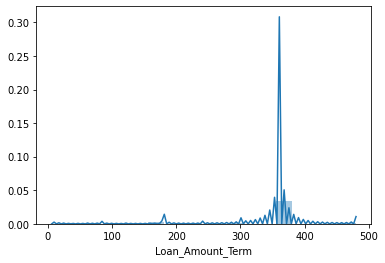

In [59]:
sns.distplot(datatest['Loan_Amount_Term'])

In [60]:
extreme=datatest.Loan_Amount_Term.mean()+3*datatest.Loan_Amount_Term.std()
datatest['Loan_Amount_Term'] = datatest['Loan_Amount_Term'].fillna(extreme)

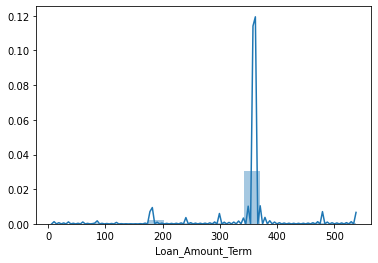

In [61]:
sns.distplot(datatest['Loan_Amount_Term'])

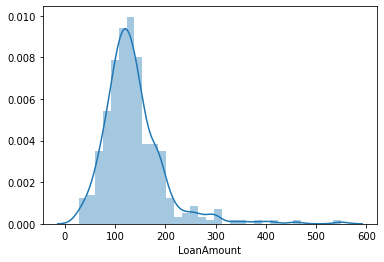

In [62]:
sns.distplot(datatest['LoanAmount'])

In [63]:
datatest['LoanAmount'] = datatest['LoanAmount'].fillna(datatest['LoanAmount'].median())

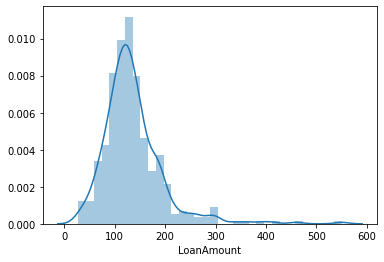

In [64]:

sns.distplot(datatest['LoanAmount'])

In [65]:
datatest.isnull().mean()

Loan_ID                0.0
Gender                 0.0
Married                0.0
Dependents             0.0
Education              0.0
Self_Employed          0.0
ApplicantIncome        0.0
CoapplicantIncome      0.0
LoanAmount             0.0
Loan_Amount_Term       0.0
Credit_History         0.0
Property_Area          0.0
Unknown Credit         0.0
Unknown_Gender         0.0
Unknown_Employement    0.0
dtype: float64

In [66]:
datatest['Married'].isnull().mean()

0.0

In [67]:
datatest

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Unknown Credit,Unknown_Gender,Unknown_Employement
0,LP001015,Male,2,0,2,No,5720,0,110.0,360.0,1.0,3,0,0,0
1,LP001022,Male,2,1,2,No,3076,1500,126.0,360.0,1.0,3,0,0,0
2,LP001031,Male,2,2,2,No,5000,1800,208.0,360.0,1.0,3,0,0,0
3,LP001035,Male,2,2,2,No,2340,2546,100.0,360.0,1.0,3,1,0,0
4,LP001051,Male,1,0,1,No,3276,0,78.0,360.0,1.0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,2,3,1,Yes,4009,1777,113.0,360.0,1.0,3,0,0,0
363,LP002975,Male,2,0,2,No,4158,709,115.0,360.0,1.0,3,0,0,0
364,LP002980,Male,1,0,2,No,3250,1993,126.0,360.0,1.0,2,1,0,0
365,LP002986,Male,2,0,2,No,5000,2393,158.0,360.0,1.0,1,0,0,0


In [68]:
gendertest = pd.get_dummies(datatest['Gender'],drop_first=True)
self_employed_test = pd.get_dummies(datatest['Self_Employed'],drop_first=True)


In [69]:
datatest['Self_Employed']

0       No
1       No
2       No
3       No
4       No
      ... 
362    Yes
363     No
364     No
365     No
366    Yes
Name: Self_Employed, Length: 367, dtype: object

In [70]:
gendertest

,Male
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [71]:
self_employed_test

,Yes
0,0
1,0
2,0
3,0
4,0
...,...
362,1
363,0
364,0
365,0


In [72]:
datatest = datatest.drop(['Gender','Self_Employed'],axis=1)
datatest_refined = pd.concat([datatest,gendertest,self_employed_test],axis=1)
datatest_refined['Married'] = datatest_refined['Married'].apply(lambda x : int(x))
datatest_refined['LoanAmount'] = datatest_refined['LoanAmount'].apply(lambda x : x * 1000)
datatest_refined.rename(columns = {'Yes':'Self_Emplyed'}, inplace = True) 

In [73]:
datatest_refined

,Loan_ID,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Unknown Credit,Unknown_Gender,Unknown_Employement,Male,Self_Emplyed
0,LP001015,2,0,2,5720,0,110000.0,360.0,1.0,3,0,0,0,1,0
1,LP001022,2,1,2,3076,1500,126000.0,360.0,1.0,3,0,0,0,1,0
2,LP001031,2,2,2,5000,1800,208000.0,360.0,1.0,3,0,0,0,1,0
3,LP001035,2,2,2,2340,2546,100000.0,360.0,1.0,3,1,0,0,1,0
4,LP001051,1,0,1,3276,0,78000.0,360.0,1.0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,2,3,1,4009,1777,113000.0,360.0,1.0,3,0,0,0,1,1
363,LP002975,2,0,2,4158,709,115000.0,360.0,1.0,3,0,0,0,1,0
364,LP002980,1,0,2,3250,1993,126000.0,360.0,1.0,2,1,0,0,1,0
365,LP002986,2,0,2,5000,2393,158000.0,360.0,1.0,1,0,0,0,1,0


In [74]:
datatestf  = datatest_refined[['Male','Unknown_Gender','Married', 'Self_Emplyed','Unknown_Employement','Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
       'Property_Area','Credit_History' , 'Unknown Credit'
       ]]

In [75]:
datatestf

,Male,Unknown_Gender,Married,Self_Emplyed,Unknown_Employement,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_History,Unknown Credit
0,1,0,2,0,0,0,2,5720,0,110000.0,360.0,3,1.0,0
1,1,0,2,0,0,1,2,3076,1500,126000.0,360.0,3,1.0,0
2,1,0,2,0,0,2,2,5000,1800,208000.0,360.0,3,1.0,0
3,1,0,2,0,0,2,2,2340,2546,100000.0,360.0,3,1.0,1
4,1,0,1,0,0,0,1,3276,0,78000.0,360.0,3,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,0,2,1,0,3,1,4009,1777,113000.0,360.0,3,1.0,0
363,1,0,2,0,0,0,2,4158,709,115000.0,360.0,3,1.0,0
364,1,0,1,0,0,0,2,3250,1993,126000.0,360.0,2,1.0,1
365,1,0,2,0,0,0,2,5000,2393,158000.0,360.0,1,1.0,0


In [76]:
datatrainf

,Male,Unknown_Gender,Married,Self_Emplyed,Unknown_Employement,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_History,Unknown Credit,Loan_Status
0,1,0,1,0,0,0,2,5849,0.0,128000.0,360.0,3,1.0,0,1
1,1,0,2,0,0,1,2,4583,1508.0,128000.0,360.0,1,1.0,0,0
2,1,0,2,1,0,0,2,3000,0.0,66000.0,360.0,3,1.0,0,1
3,1,0,2,0,0,0,1,2583,2358.0,120000.0,360.0,3,1.0,0,1
4,1,0,1,0,0,0,2,6000,0.0,141000.0,360.0,3,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,0,0,2,2900,0.0,71000.0,360.0,1,1.0,0,1
610,1,0,2,0,0,3,2,4106,0.0,40000.0,180.0,1,1.0,0,1
611,1,0,2,0,0,1,2,8072,240.0,253000.0,360.0,3,1.0,0,1
612,1,0,2,0,0,2,2,7583,0.0,187000.0,360.0,3,1.0,0,1


In [77]:
datatrainf['Dependents'].value_counts()

0    345
1    102
2    101
3     51
0     15
Name: Dependents, dtype: int64

In [78]:
datatrainf['Dependents'] = datatrainf['Dependents'].apply(lambda x : int(x))

In [79]:
datatestf['Dependents'] = datatestf['Dependents'].apply(lambda x : int(x))

In [80]:
datatrainf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Male                 614 non-null    uint8  
 1   Unknown_Gender       614 non-null    int64  
 2   Married              614 non-null    int64  
 3   Self_Emplyed         614 non-null    uint8  
 4   Unknown_Employement  614 non-null    int64  
 5   Dependents           614 non-null    int64  
 6   Education            614 non-null    int64  
 7   ApplicantIncome      614 non-null    int64  
 8   CoapplicantIncome    614 non-null    float64
 9   LoanAmount           614 non-null    float64
 10  Loan_Amount_Term     614 non-null    float64
 11  Property_Area        614 non-null    int64  
 12  Credit_History       614 non-null    float64
 13  Unknown Credit       614 non-null    int64  
 14  Loan_Status          614 non-null    int64  
dtypes: float64(4), int64(9), uint8(2)
memory

In [81]:
datatestf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Male                 367 non-null    uint8  
 1   Unknown_Gender       367 non-null    int64  
 2   Married              367 non-null    int64  
 3   Self_Emplyed         367 non-null    uint8  
 4   Unknown_Employement  367 non-null    int64  
 5   Dependents           367 non-null    int64  
 6   Education            367 non-null    int64  
 7   ApplicantIncome      367 non-null    int64  
 8   CoapplicantIncome    367 non-null    int64  
 9   LoanAmount           367 non-null    float64
 10  Loan_Amount_Term     367 non-null    float64
 11  Property_Area        367 non-null    int64  
 12  Credit_History       367 non-null    float64
 13  Unknown Credit       367 non-null    int64  
dtypes: float64(3), int64(9), uint8(2)
memory usage: 35.2 KB


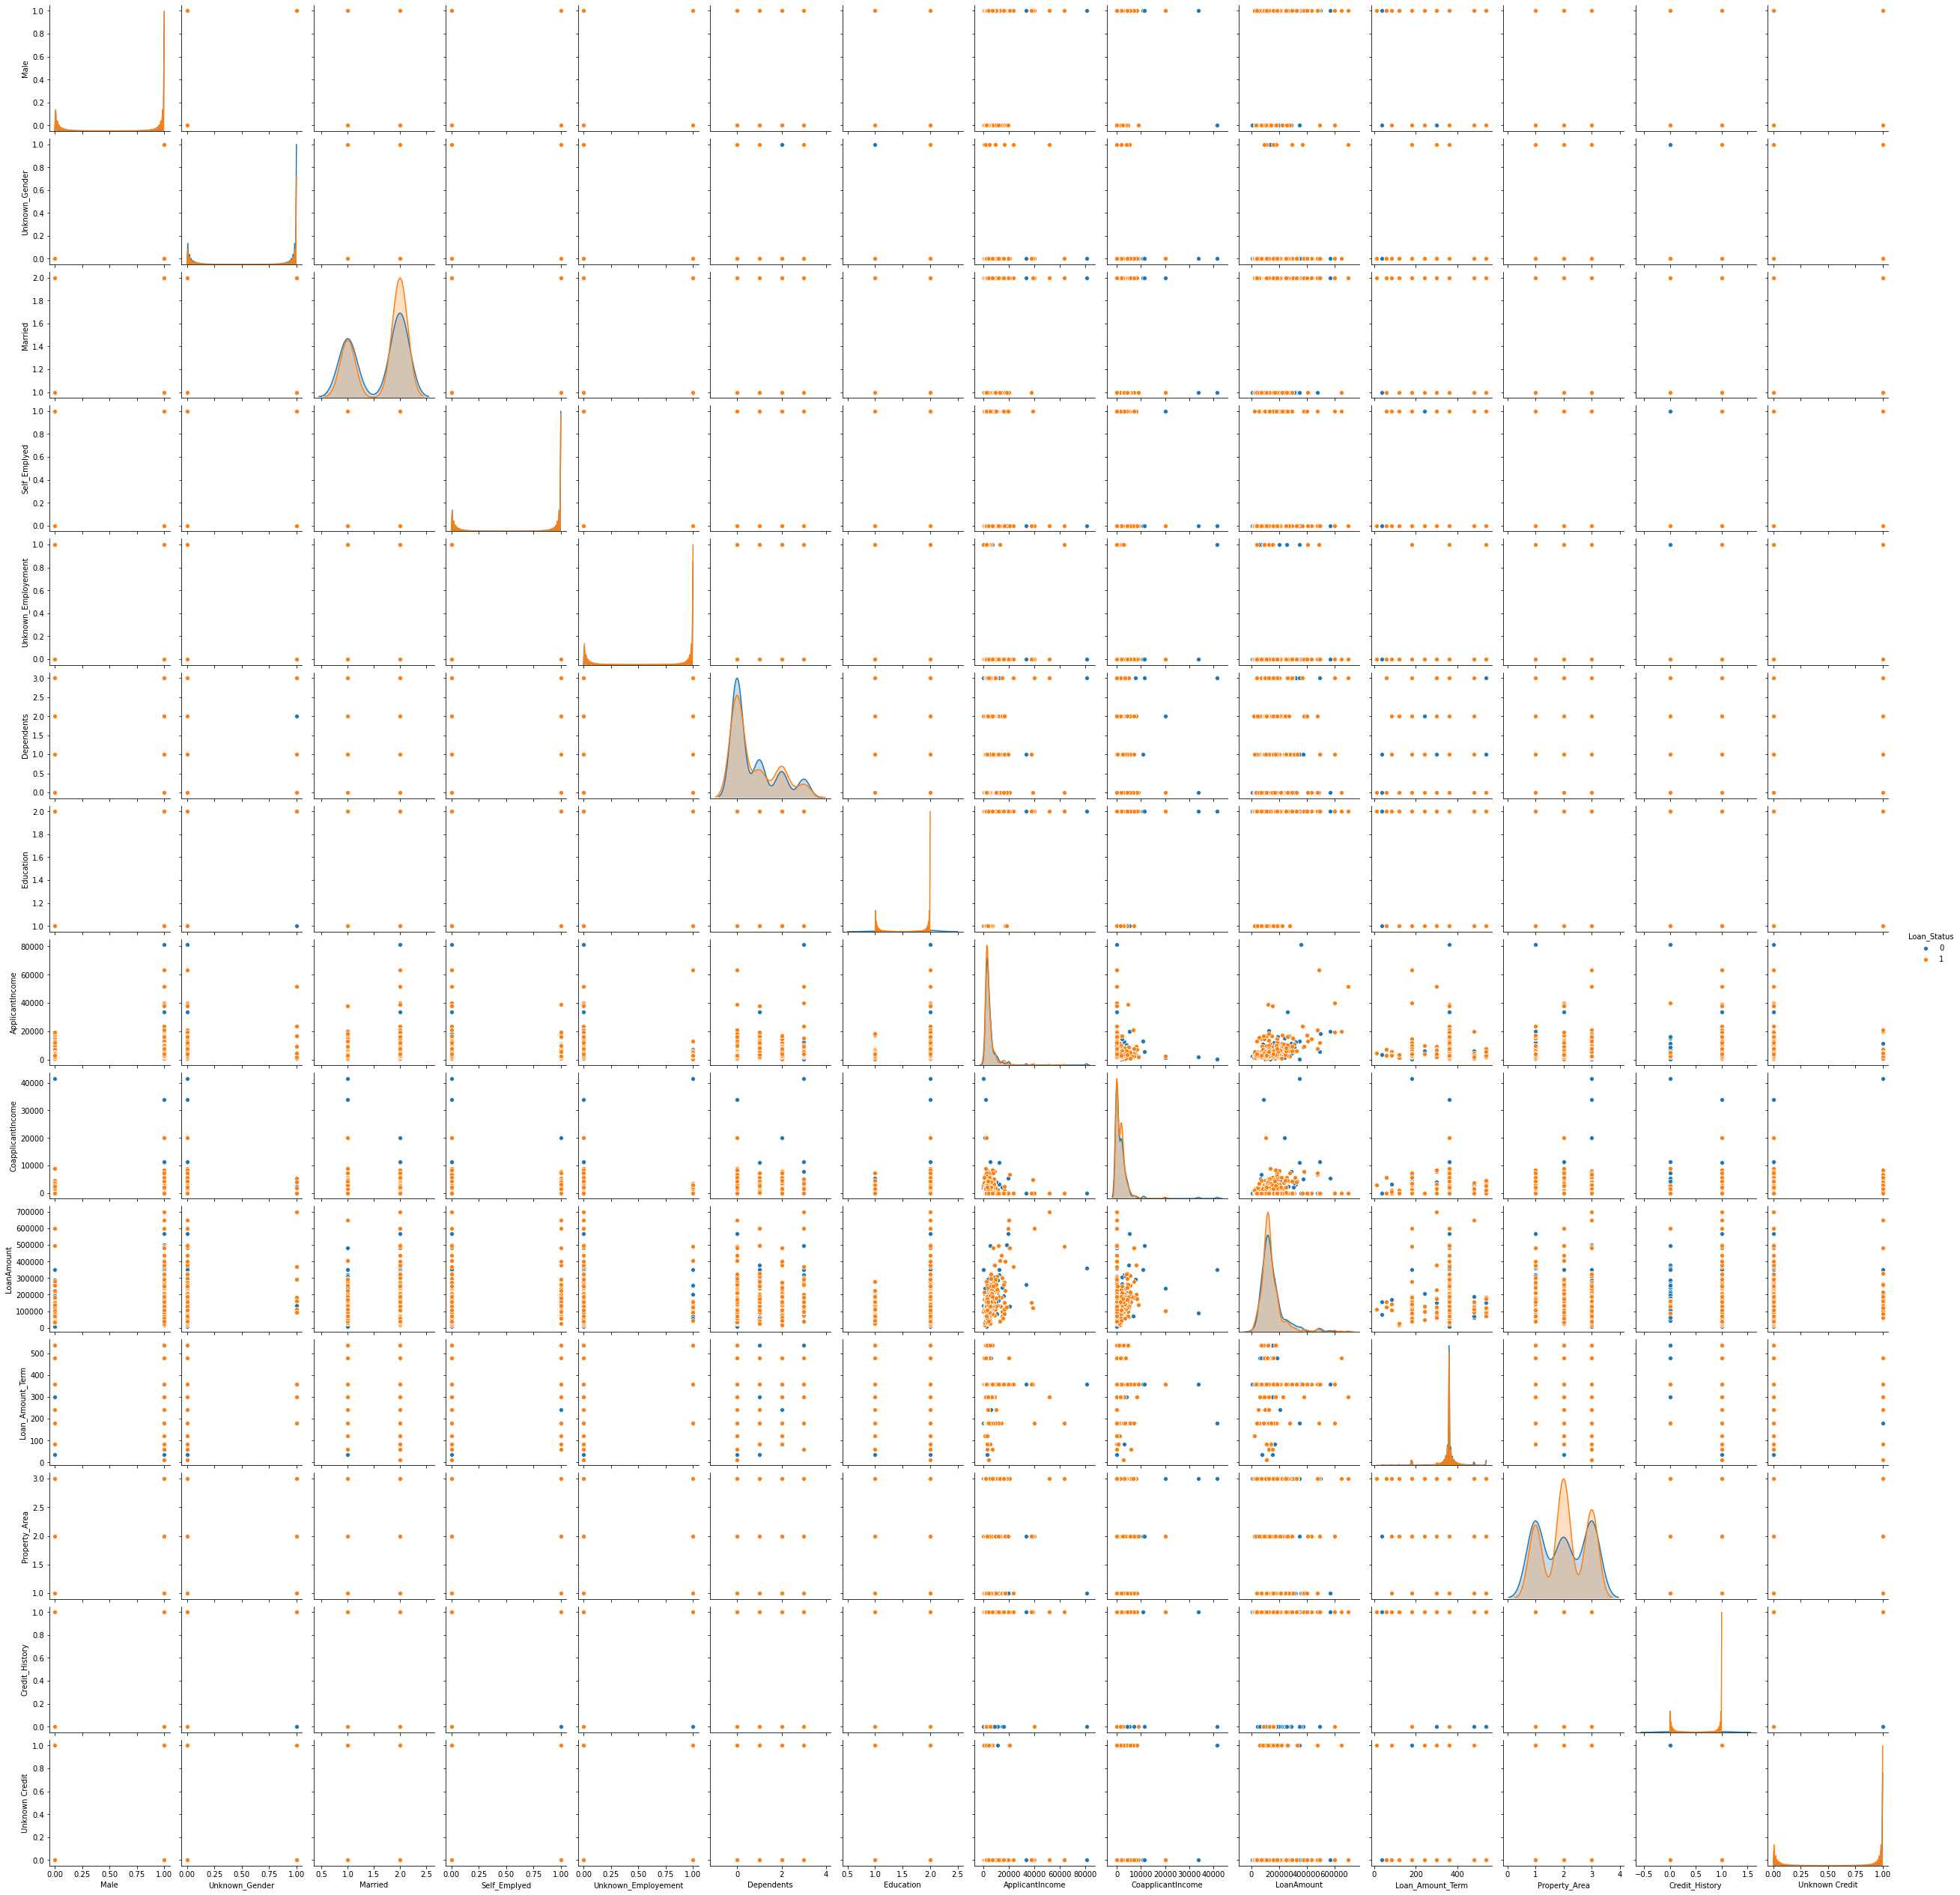

In [82]:
sns.pairplot(datatrainf,hue='Loan_Status')

## Feature Selection

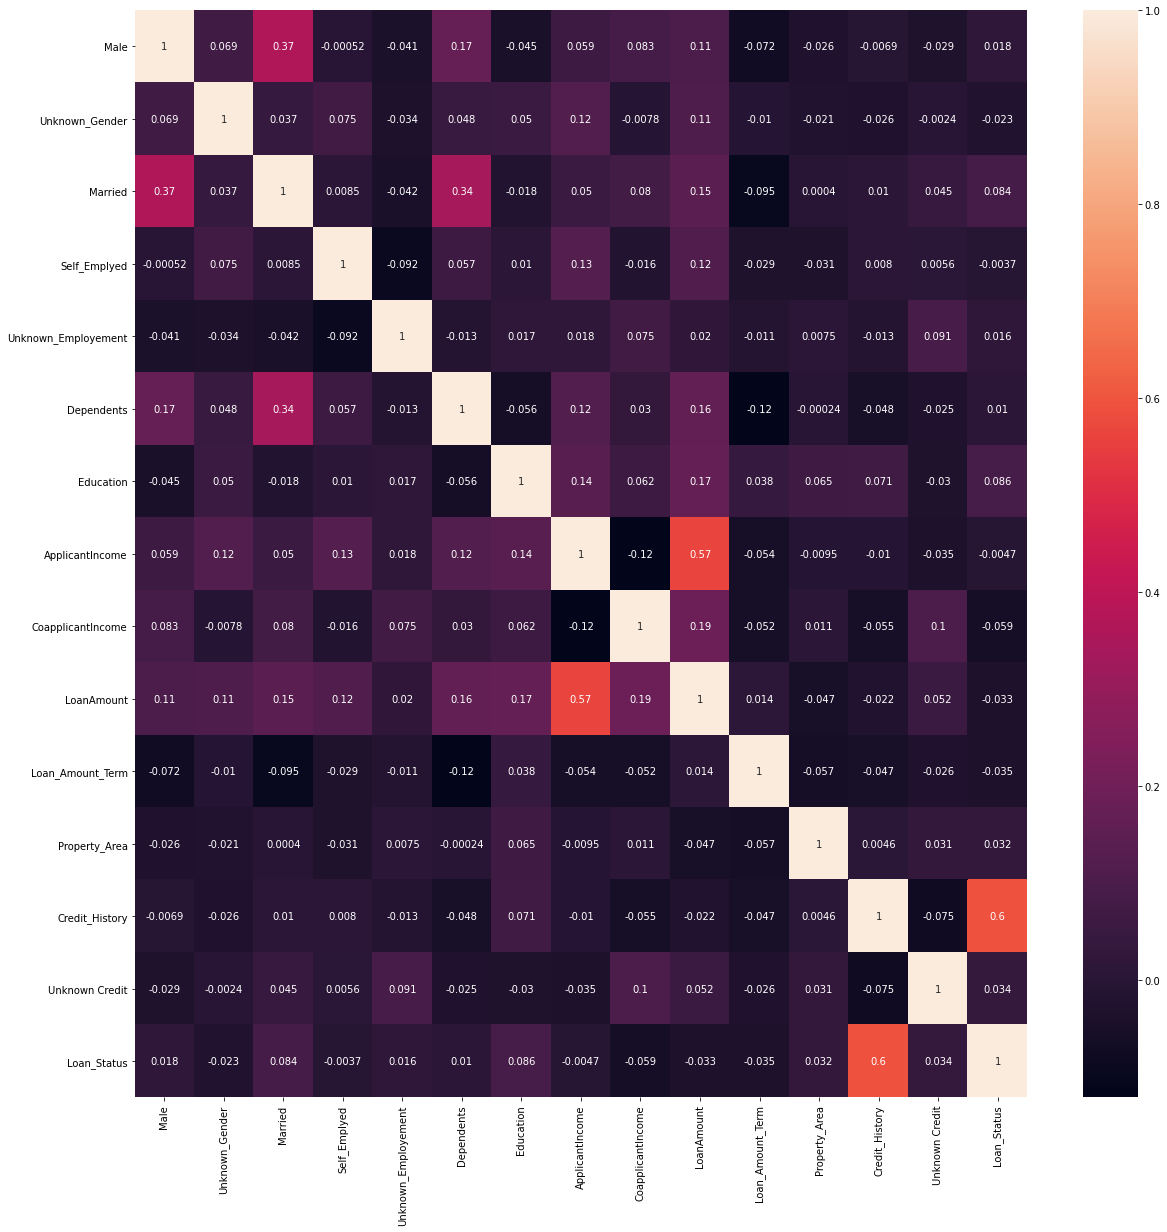

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(datatrainf.corr(),annot=True)

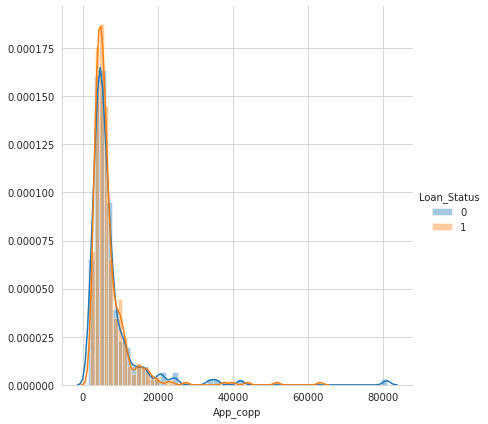

In [ ]:
sns.set_style('whitegrid');
sns.FacetGrid(datatrainf,hue='Loan_Status',size=6).map(sns.distplot,'App_copp').add_legend();
plt.show()

In [83]:
X = datatrainf.drop('Loan_Status',axis=1)
y = datatrainf['Loan_Status']

In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

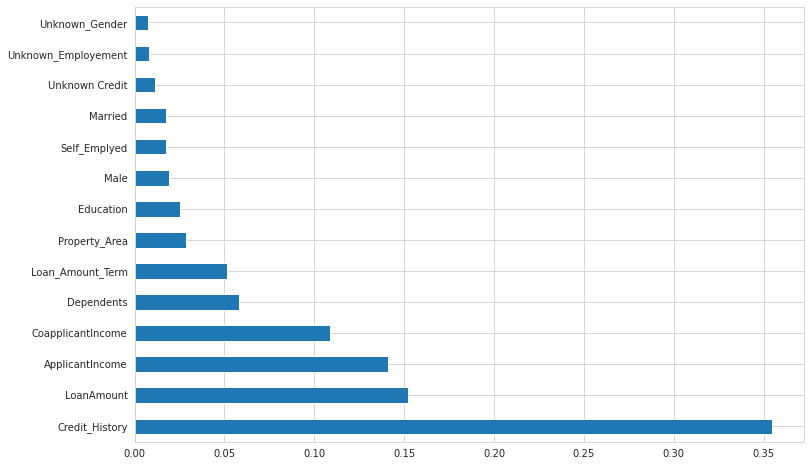

In [ ]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

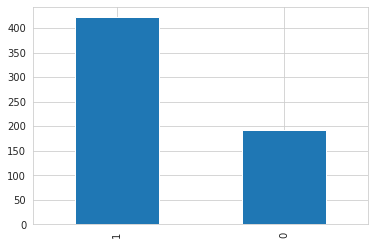

In [ ]:
datatrainf.Loan_Status.value_counts().plot(kind='bar')

In [84]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [ ]:
y_train.value_counts()

1    337
0    154
Name: Loan_Status, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

1.0
0.8130081300813008


## Trying on Multiple Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
lr = LogisticRegression()
lsvc = LinearSVC()
dt = DecisionTreeClassifier()
gbdt = GradientBoostingClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier()

In [ ]:
models = list([lr,lsvc,dt,gbdt,knn,xgb])

In [ ]:
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix

In [ ]:
%%time
model_score = []
model_roc_auc = []
for i in models:
  i.fit(X_train,y_train)
  i_pred = i.predict(X_test)
  model_score.append(i.score(X_test,y_test))
  model_roc_auc.append(roc_auc_score(y_test,i_pred))

CPU times: user 225 ms, sys: 7.05 ms, total: 232 ms
Wall time: 326 ms


In [ ]:
model_roc_auc

[0.5,
 0.5,
 0.660061919504644,
 0.7496904024767802,
 0.5260061919504644,
 0.7396284829721362]

In [ ]:
model_score

[0.6910569105691057,
 0.6910569105691057,
 0.6910569105691057,
 0.8048780487804879,
 0.6666666666666666,
 0.8211382113821138]

## Hyperparameter Tuning using Tpot-Classifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
pip install tpot

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.6MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=eff162575e3e2ecfd8d5acd0df159705765194cb40e2ef30605771a5a4b18e57
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': random_grid}, 
                                 cv = 4, scoring = 'roc_auc')
tpot_classifier.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.804827018526709
Generation 2 - Current best internal CV score: 0.8066029515719917
Generation 3 - Current best internal CV score: 0.8066029515719917
Generation 4 - Current best internal CV score: 0.8066029515719917

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), criterion=gini, max_depth=780, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                 

In [ ]:
tpot_classifier.fit(X_train,y_train)

<bound method BaseEstimator.get_params of TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                       

In [85]:
from sklearn.ensemble import RandomForestClassifier
rft  = RandomForestClassifier(criterion='gini', max_depth=780, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=200)
rft.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=780, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
y_predt = rft.predict(X_test)

In [87]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_predt))

0.7572755417956657


##Saving the Model

In [90]:
import pickle
pickle.dump(rft,open('loan_predrf.pkl','wb'))

## Doing Prediction on testdataset

In [88]:
y_testpred = rft.predict(datatestf)

In [89]:
y_testpred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [94]:
submission_csv = pd.DataFrame(datatest['Loan_ID'])

In [96]:
submission_csv['Loan_Status'] = y_testpred

In [97]:
submission_csv

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [99]:
ls = {1:'Y',0:'N'}
submission_csv['Loan_Status'] = submission_csv['Loan_Status'].map(ls)

In [100]:
##Converting the final result to csv
submission_csv.to_csv('final.csv')